<a href="https://colab.research.google.com/github/nikunjchapadia/fastbook/blob/master/collaborative_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.1 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 1.2 MB 44.3 MB/s 
     |████████████████████████████████| 189 kB 50.7 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 51 kB 279 kB/s 
Mounted at /content/gdrive


In [9]:
from fastbook import *

In [10]:
from fastai.collab import *
from fastai.tabular.all import *
path = untar_data(URLs.ML_100k)

In [11]:
ratings = pd.read_csv(
    path/'u.data', 
    delimiter='\t', 
    header=None,
    names=['user', 'movie', 'rating', 'timestamp']
)

ratings.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
# cross tab 


In [ ]:
last_skywaker = np.array([0.98, 0.9, -0.9])

In [ ]:
user1 = np.array([0.9, 0.8, -0.6])

In [ ]:
user1*last_skywaker, (user1*last_skywaker).sum()

(array([0.882, 0.72 , 0.54 ]), 2.1420000000000003)

In [ ]:
casablanca = np.array([-0.99, -0.3, 0.8])

In [ ]:
user1*casablanca, (user1*casablanca).sum()

(array([-0.891, -0.24 , -0.48 ]), -1.611)

In [ ]:
# we dont know what the latent factors actually are
# we dont know how to score them for each user and movie 
# we should learn them 

# latent factors

In [12]:
movies = pd.read_csv(
    path/'u.item', 
    delimiter='|', 
    encoding='latin-1',
    usecols=(0,1),
    header=None,
    names=['movie', 'title']
)

movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
ratings = ratings.merge(movies)
ratings.head()

,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [14]:
dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
dls.show_batch()

,user,title,rating
0,542,My Left Foot (1989),4
1,422,Event Horizon (1997),3
2,311,"African Queen, The (1951)",4
3,595,Face/Off (1997),4
4,617,Evil Dead II (1987),1
5,158,Jurassic Park (1993),5
6,836,Chasing Amy (1997),3
7,474,Emma (1996),3
8,466,Jackie Chan's First Strike (1996),3
9,554,Scream (1996),3


In [15]:
dls.classes

{'title': ['#na#', "'Til There Was You (1997)", '1-900 (1994)', '101 Dalmatians (1996)', '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)', '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)', '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)', '8 1/2 (1963)', '8 Heads in a Duffel Bag (1997)', '8 Seconds (1994)', 'A Chef in Love (1996)', 'Above the Rim (1994)', 'Absolute Power (1997)', 'Abyss, The (1989)', 'Ace Ventura: Pet Detective (1994)', 'Ace Ventura: When Nature Calls (1995)', 'Across the Sea of Time (1995)', 'Addams Family Values (1993)', 'Addicted to Love (1997)', 'Addiction, The (1995)', 'Adventures of Pinocchio, The (1996)', 'Adventures of Priscilla, Queen of the Desert, The (1994)', 'Adventures of Robin Hood, The (1938)', 'Affair to Remember, An (1957)', 'African Queen, The (1951)', 'Afterglow (1997)', 'Age of Innocence, The (1993)', 'Aiqing wansui (1994)', 'Air Bud (1997)', 'Air Force One (1997)', 'Air Up There, The (199

In [16]:
n_users = len(dls.classes['user'])
n_movies = len(dls.classes['title'])
n_factors = 5
n_users, n_movies, n_factors

(944, 1665, 5)

In [17]:
user_factors = torch.randn(n_users, n_factors)
movie_factors = torch.randn(n_movies, n_factors)

In [18]:
one_hot_3 = one_hot(3, n_users).float()
user_factors.t() @ one_hot_3

tensor([-0.4586, -0.9915, -0.4052, -0.3621, -0.5908])

In [19]:
one_hot_3, one_hot_3.shape, user_factors

(tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [20]:
user_factors.t() @ one_hot_3

tensor([-0.4586, -0.9915, -0.4052, -0.3621, -0.5908])

In [21]:
user_factors[3]

tensor([-0.4586, -0.9915, -0.4052, -0.3621, -0.5908])

In [ ]:
# embedding matrix


In [1]:
class Example:
  def __init__(self, a):
    self.a = a

  def say(self, x):
    return f'Hello {self.a}, {x}.'

In [4]:
ex = Example('Aum')
ex.say('Namaste')

'Hello Aum, Namaste.'

In [22]:
# Architecture 
class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        return (users * movies).sum(dim=1)

In [23]:
x,y = dls.one_batch()
x.shape

torch.Size([64, 2])

In [24]:
x

tensor([[ 661,  659],
        [ 861,  730],
        [ 766,    8],
        [  13, 1153],
        [ 429, 1185],
        [ 488, 1242],
        [ 675, 1638],
        [ 271,  987],
        [ 677,  772],
        [ 301, 1139],
        [ 874,  830],
        [ 593, 1097],
        [ 814, 1065],
        [ 897,  274],
        [ 635, 1370],
        [ 567, 1067],
        [ 399,  241],
        [ 649, 1524],
        [ 309, 1347],
        [ 378,  356],
        [ 104, 1589],
        [ 197,  622],
        [ 886, 1442],
        [  78, 1610],
        [ 480,  774],
        [ 457,  110],
        [ 815, 1290],
        [ 840,  624],
        [ 804,  180],
        [ 627, 1017],
        [ 102,  600],
        [ 904,  374],
        [ 301,  262],
        [ 561,  374],
        [ 301,  754],
        [ 439,  426],
        [ 171, 1303],
        [ 730, 1102],
        [ 239, 1649],
        [ 454,  274],
        [ 871, 1616],
        [ 653, 1246],
        [ 116,  927],
        [ 189, 1270],
        [ 524, 1457],
        [ 

In [29]:
n_users,n_movies
model = DotProduct(n_users, n_movies, 50)
model

DotProduct(
  (user_factors): Embedding(944, 50)
  (movie_factors): Embedding(1665, 50)
)

In [30]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())

In [31]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,1.379127,1.304668,00:10
1,1.079381,1.105131,00:11
2,0.910561,0.968404,00:12
3,0.815893,0.889137,00:10
4,0.752845,0.873523,00:10


In [35]:
# result is not good we need use y range 

class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        return sigmoid_range((users * movies).sum(dim=1), *self.y_range)

In [36]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.982362,0.986661,00:10
1,0.852547,0.903990,00:10
2,0.672538,0.872037,00:10
3,0.487766,0.875323,00:10
4,0.365461,0.879229,00:10


In [37]:
# not much change in results 

class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.user_bias = Embedding(n_users, 1)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.movie_bias = Embedding(n_movies, 1)
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        res = (users * movies).sum(dim=1, keepdim=True)
        res += self.user_bias(x[:,0]) + self.movie_bias(x[:,1])
        return sigmoid_range(res, *self.y_range)

In [38]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.968129,0.944642,00:11
1,0.809562,0.862081,00:11
2,0.634707,0.858348,00:11
3,0.407301,0.883958,00:11
4,0.293724,0.890022,00:13


In [ ]:
# its overfitting 
# find a way to train more epoch without overfittinng 

# Regularisation technique - weight decay


#  add sum of all weights squared to loss function 
# why? when we compute gradients it will add a contributionnn to them that will 
# encourage the weights to be as small as possible. 

# why would it prevent overfitting?
# the larger the coefficiencies are the more sharp canyons will be in loss functiion

# basic parabola y = a * (x**2) the larger the a is the more narrow the parabola is

In [39]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.981716,0.955091,00:11
1,0.883748,0.872860,00:11
2,0.739751,0.837159,00:11
3,0.608681,0.823698,00:11
4,0.488663,0.824242,00:11


In [40]:
# Embedding 
# embeding layer is just computational shortucut 
# metrix multiplication by one hot encoding that is same as indexing an array

class T(Module):
  def __init__(self):
      self.a = torch.ones(3)


L(T().parameters())

(#0) []

In [47]:
class T(Module):
  def __init__(self):
      self.a = nn.Parameter(torch.ones(3))

L(T().parameters())

(#1) [Parameter containing:
tensor([1., 1., 1.], requires_grad=True)]

In [49]:
class T(Module):
  def __init__(self):
      self.a = nn.Linear(1,3, bias=False)

t = T()
L(t.parameters())

(#1) [Parameter containing:
tensor([[ 0.4749],
        [ 0.5782],
        [-0.2816]], requires_grad=True)]

In [50]:
type(t.a.weight)

torch.nn.parameter.Parameter

In [61]:
# create tensor as a param with random init
def create_params1(size):
  # return nn.Parameter(torch.Variable(torch.zeros(*size).nomral_(0,0.01)))
  return nn.Parameter(torch.zeros(*size).nomral_(0,0.01))

In [67]:
def create_params(size):
    return nn.Parameter(torch.zeros(*size).normal_(0, 0.01))

In [72]:
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = create_params([n_users, n_factors])
        self.user_bias = create_params([n_users])
        self.movie_factors = create_params([n_movies, n_factors])
        self.movie_bias = create_params([n_movies])
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors[x[:,0]]
        movies = self.movie_factors[x[:,1]]
        res = (users * movies).sum(dim=1)
        res += self.user_bias[x[:,0]] + self.movie_bias[x[:,1]]
        return sigmoid_range(res, *self.y_range)        

In [71]:
# model = DotProductBias(n_users, n_movies, 50)
# learn = Learner(dls, model, loss_func=MSELossFlat())
# learn.fit_one_cycle(5, 5e-3, wd=0.1)

model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.918434,0.941065,00:11
1,0.839483,0.871407,00:11
2,0.727462,0.833661,00:11
3,0.568885,0.819025,00:11
4,0.482803,0.820134,00:10


In [76]:
movie_bias = learn.model.movie_bias.square()
movie_bias
idxs = movie_bias.argsort()[:20]
[dls.classes['title'][i] for i in idxs]

['Next Step, The (1995)',
 'Scarlet Letter, The (1995)',
 "Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)",
 '1-900 (1994)',
 'Careful (1992)',
 'B. Monkey (1998)',
 'Reluctant Debutante, The (1958)',
 'Forbidden Christ, The (Cristo proibito, Il) (1950)',
 'Bird of Prey (1996)',
 'Sweet Nothing (1995)',
 'Mostro, Il (1994)',
 'Picture Perfect (1997)',
 'August (1996)',
 '#na#',
 'Leopard Son, The (1996)',
 'Tom & Viv (1994)',
 'Striking Distance (1993)',
 'Unhook the Stars (1996)',
 'Getting Away With Murder (1996)',
 'Bhaji on the Beach (1993)']

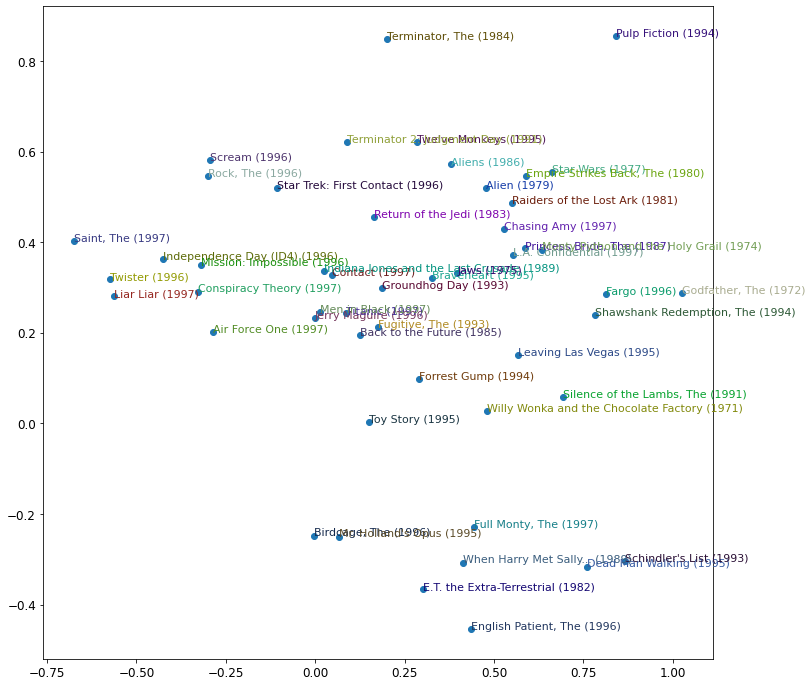

In [77]:
#caption Representation of movies based on two strongest PCA components
#alt Representation of movies based on two strongest PCA components
g = ratings.groupby('title')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_idxs = tensor([learn.dls.classes['title'].o2i[m] for m in top_movies])
movie_w = learn.model.movie_factors[top_idxs].cpu().detach()
movie_pca = movie_w.pca(3)
fac0,fac1,fac2 = movie_pca.t()
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(12,12))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

In [78]:
learn = collab_learner(dls, n_factors=50, y_range=(0,5.5))

In [79]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.961252,0.946288,00:19
1,0.845337,0.881391,00:18
2,0.739329,0.833984,00:17
3,0.588575,0.823999,00:10
4,0.501971,0.825047,00:14


In [80]:
learn.model


EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1665, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1665, 1)
)

In [81]:
movie_bias = learn.model.i_bias.weight.squeeze()
idxs = movie_bias.argsort(descending=True)[:20]
[dls.classes['title'][i] for i in idxs]

['L.A. Confidential (1997)',
 'Silence of the Lambs, The (1991)',
 'Titanic (1997)',
 'Shawshank Redemption, The (1994)',
 'Good Will Hunting (1997)',
 "Schindler's List (1993)",
 'Star Wars (1977)',
 'Wrong Trousers, The (1993)',
 'Usual Suspects, The (1995)',
 'Rear Window (1954)',
 'Close Shave, A (1995)',
 'As Good As It Gets (1997)',
 'Apt Pupil (1998)',
 'Vertigo (1958)',
 'Godfather, The (1972)',
 'Casablanca (1942)',
 'Fugitive, The (1993)',
 'Boot, Das (1981)',
 '12 Angry Men (1957)',
 'Raiders of the Lost Ark (1981)']

In [94]:
# we can find the distance between two movie to see 
# pythagoras sr root of x2+y2 

movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i['Silence of the Lambs, The (1991)']
# idx - 1330
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1]
dls.classes['title'][idx]
# movie_factors, distances, idx


'Cement Garden, The (1993)'